# SHEEMA MASOOD
## DATA SCIENCE WITH AI
### ASSIGNMENT RANDOM FOREST CLASSIFIERS

### **OBJECTIVE: performed Random Forest on the given Kaggle Datasets
### https://www.kaggle.com/datasets/uciml/glass?select=glass.csv
### This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)**

# Random Forest Classifiers

- Random Forest is an ensemble learning method that uses multiple decision trees to improve model accuracy and robustness.
- It combines the predictions of several decision trees to produce a more accurate and stable prediction.

How It Works
1. **Bootstrap Aggregating (Bagging)**:

The algorithm creates multiple subsets of the original training data using bootstrapping (random sampling with replacement).
Each subset is used to train a separate decision tree.

2. **Random Feature Selection**:

During the training of each decision tree, a random subset of features is considered for splitting nodes, rather than using all features.
This helps in reducing correlation among the trees and improves the diversity of the model.

3. **Voting/Averaging**:

**For classification tasks**: The final prediction is based on majority voting from all the decision trees (i.e., the class with the most votes is chosen).


**For regression tasks**: The final prediction is the average of the predictions from all the decision trees.



## Random Forest for Classification
### Purpose: 
Predict categorical outcomes (e.g., spam vs. not spam, disease vs. no disease).

### Mechanism: 
Each decision tree in the forest makes a prediction for a given input, and the class that receives the most votes from all the trees is chosen as the final prediction.

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV


## Load Dataset 

In [3]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Exploratory Data Analysis

In [4]:
df.shape

(214, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 1


In [8]:
# Drop duplicates if any
df = df.drop_duplicates()

In [9]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

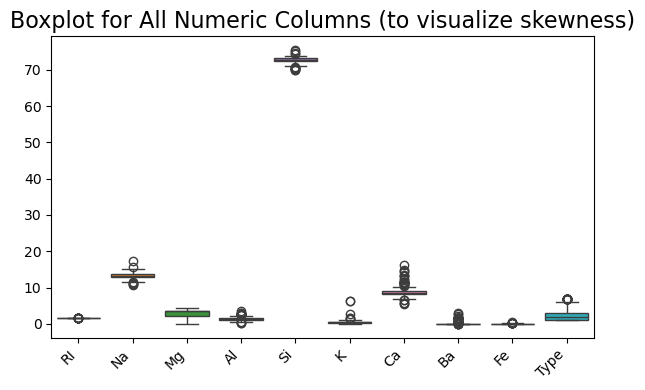

In [10]:
# Select only numeric columns (int and float)
numeric_columns = df.select_dtypes(include = ['int64', 'float64'])

# Set the figure size for better readability
plt.figure(figsize=(6, 4))

# Create a boxplot for each numeric column
sns.boxplot(data = numeric_columns)

# Add titles and labels for clarity
plt.title('Boxplot for All Numeric Columns (to visualize skewness)', fontsize=16)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Display the plot
plt.savefig('Boxplot for All Numeric Columns (to visualize skewness)')
plt.show()

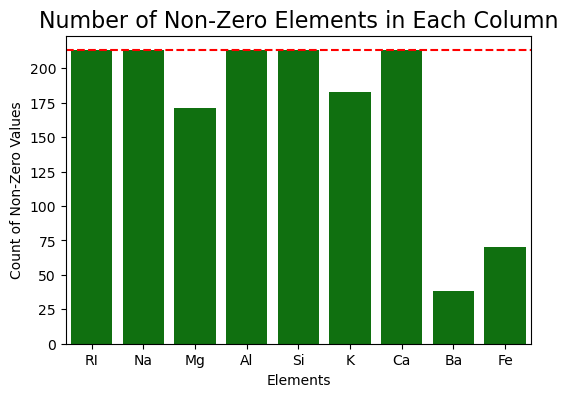

In [11]:
# Count the number of non-zero elements in each column
element_samples = (df.drop(columns = 'Type') != 0).sum(axis=0)

# Plot the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x = element_samples.index, y = element_samples.values, color='green')

# Add a horizontal dashed red line at the number of rows in the dataset
plt.axhline(y = df.shape[0], linestyle='--', color='red')

# Add titles and labels for clarity
plt.title('Number of Non-Zero Elements in Each Column', fontsize=16)
plt.xlabel('Elements')
plt.ylabel('Count of Non-Zero Values')

# Display the plot
plt.savefig('Number of Non-Zero Elements in Each Column')
plt.show()

## **Na, Al, Si and Ca are in all the 213 samples. Ba and Fe are non very common.**

## COrrelation MAtrix

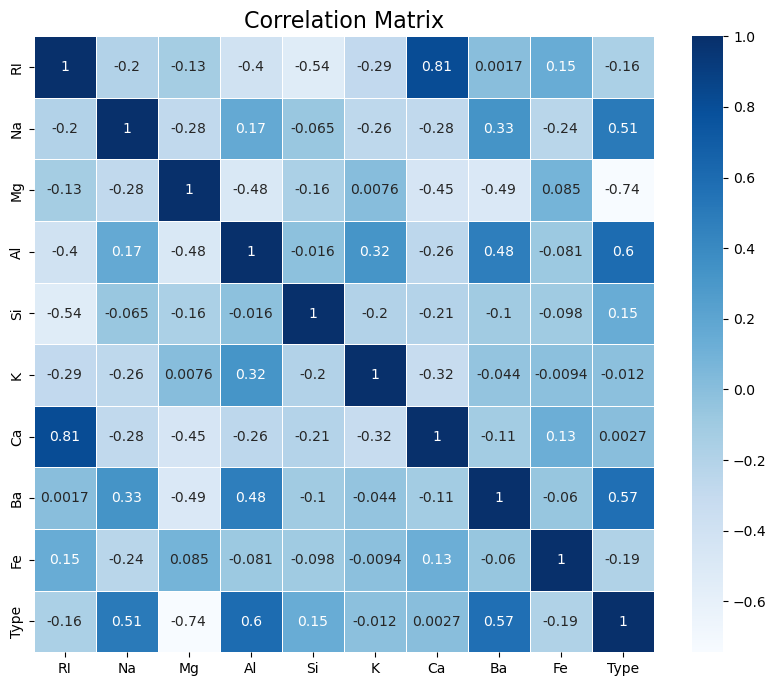

In [12]:
# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", linewidths=0.5)

# Add titles and labels
plt.title("Correlation Matrix", fontsize=16)

# Display the heatmap
plt.savefig('Correlation Matrix')
plt.show()

## **"""It looks like the presence of Ca is high correlated with a high RI, while Si is responsable of low RI. Let’s take a look how RI varies through each type of glass"""**

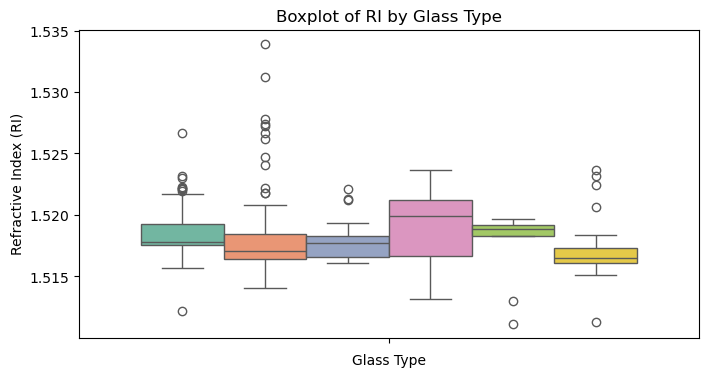

In [13]:
# Create the boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(hue ='Type', y ='RI', data = df,legend = False, palette='Set2')
plt.title('Boxplot of RI by Glass Type')
plt.xlabel('Glass Type')
plt.ylabel('Refractive Index (RI)')
plt.show()

## **Type 2 exhibits numerous high outliers, while Type 5 shows a wide range of values. In contrast, Types 6 and 7 have a very narrow range of values.**

In [14]:
# Convert to binary where values > 0 are 1, else 0
data_binary = ((numeric_columns.drop(columns = ['RI' , 'Type'])) > 0).astype(int)

# Add 'Type' column back to the DataFrame
data_binary['Type'] = df['Type']

# Group by 'Type' and summarize counts for each element
summary = data_binary.groupby('Type').sum()

# Optionally reset index to have 'Type' as a column instead of an index
summary = summary.reset_index()

summary

,Type,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,69,69,69,69,68,69,3,25
1,2,76,67,76,76,73,76,6,32
2,3,17,17,17,17,16,17,1,5
3,5,13,6,13,13,13,13,2,2
4,6,9,6,9,9,0,9,0,0
5,7,29,6,29,29,13,29,26,6


## **"All elements are present in every type of glass except for potassium (K), barium (Ba), and iron (Fe), which do not appear in Type 6 of glass."**

## Review and visualizing target class

In [15]:
df['Type'].value_counts()

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

C:\Users\muhammad mohsin\AppData\Local\Temp\ipykernel_8544\2691932634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='Type', data=df, palette='Set2', legend = False)


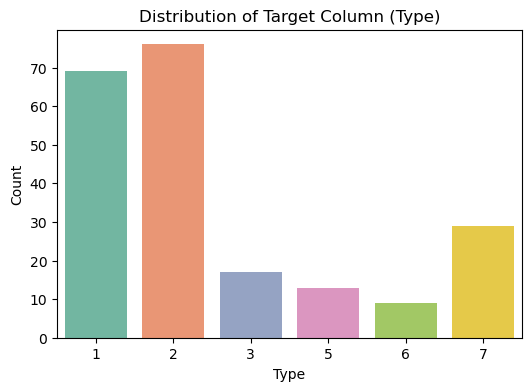

In [16]:
# Assuming 'Type' is your target column and it is categorical
plt.figure(figsize=(6, 4))
sns.countplot(x ='Type', data=df, palette='Set2', legend = False)
plt.title('Distribution of Target Column (Type)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.savefig('Distribution of Target Column (Type)')
plt.show()

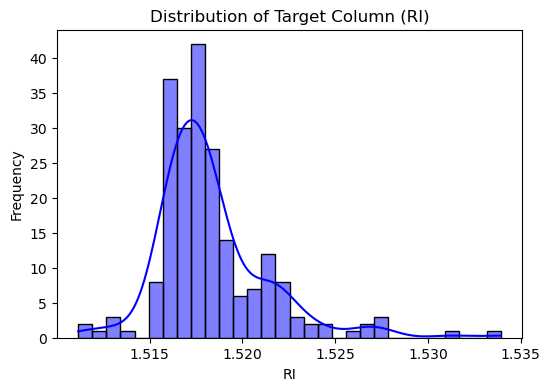

In [17]:
# Assuming 'RI' is your target column and it is numerical
plt.figure(figsize=(6, 4))
sns.histplot(df['RI'], kde=True, bins=30, color='blue')
plt.title('Distribution of Target Column (RI)')
plt.xlabel('RI')
plt.ylabel('Frequency')
plt.show()

-----

### Skewness Of Dataset

In [18]:
df.skew()

RI      1.648017
Na      0.465699
Mg     -1.146096
Al      0.938402
Si     -0.744646
K       6.545429
Ca      2.050752
Ba      3.406749
Fe      1.747173
Type    1.108861
dtype: float64

In [19]:
# Apply transformations to reduce skewness
df['K'] = np.power(df['K'], 1/3)

df['Ba'] = np.power(df['Ba'], 1/4)

In [20]:
# Recalculate skewness after transformation
df.skew()

RI      1.648017
Na      0.465699
Mg     -1.146096
Al      0.938402
Si     -0.744646
K      -0.599103
Ca      2.050752
Ba      1.928042
Fe      1.747173
Type    1.108861
dtype: float64

## split the dataset

In [21]:
df.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
196,1.51556,13.87,0.00,2.54,73.23,0.519249,9.41,0.948683,0.01,7
75,1.51590,13.02,3.58,1.51,73.12,0.883656,7.96,0.000000,0.00,2
70,1.51574,14.86,3.67,1.74,71.87,0.542884,7.36,0.000000,0.12,2


In [22]:
features = df.drop(columns = "Type")
target = df['Type']

In [23]:
features.sample()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
58,1.51754,13.48,3.74,1.17,72.99,0.838721,8.03,0.0,0.0


In [24]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

-------

## Test Train Splits

In [25]:
X_train,X_test,y_train,y_test=train_test_split(features , target , test_size=0.2 , random_state=42, stratify = target)

In [26]:
X_train.sample()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
42,1.51779,13.21,3.39,1.33,72.76,0.838721,8.59,0.0,0.0


In [27]:
y_train.sample()

187    7
Name: Type, dtype: int64

## Scaling the Data

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

------

## Model Building 

In [29]:
clf = RandomForestClassifier(
    criterion = 'gini',
    max_depth = 10,
    min_samples_split = 10,
    random_state = 42,
    n_estimators = 100
)

## Train the model

In [30]:
clf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

## Make Predictions

In [31]:
y_pred =clf.predict(X_test_scaled)

In [32]:
y_pred

array([7, 5, 2, 5, 1, 2, 2, 5, 1, 1, 3, 1, 7, 6, 2, 7, 7, 1, 2, 2, 1, 1,
       7, 2, 1, 3, 2, 2, 2, 1, 7, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 6],
      dtype=int64)

## Model Evaluation

In [33]:
# evaluate the model
ConfusionMatrix = confusion_matrix(y_test, y_pred)
EvaluationReport = classification_report(y_test, y_pred)
print(ConfusionMatrix)
print(EvaluationReport)

[[12  2  0  0  0  0]
 [ 2 12  0  1  0  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.80      0.80      0.80        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.88      0.83      0.85        43
weighted avg       0.84      0.84      0.84        43



## Visualize the results

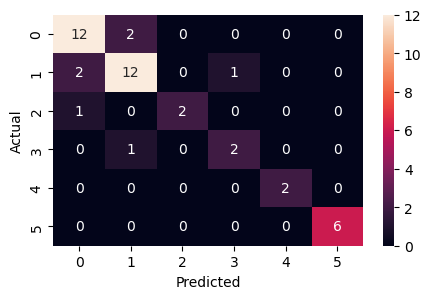

In [34]:
# draw the confusion matrix using heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## find out feature importances

Text(0.5, 1.0, 'Feature Importance')

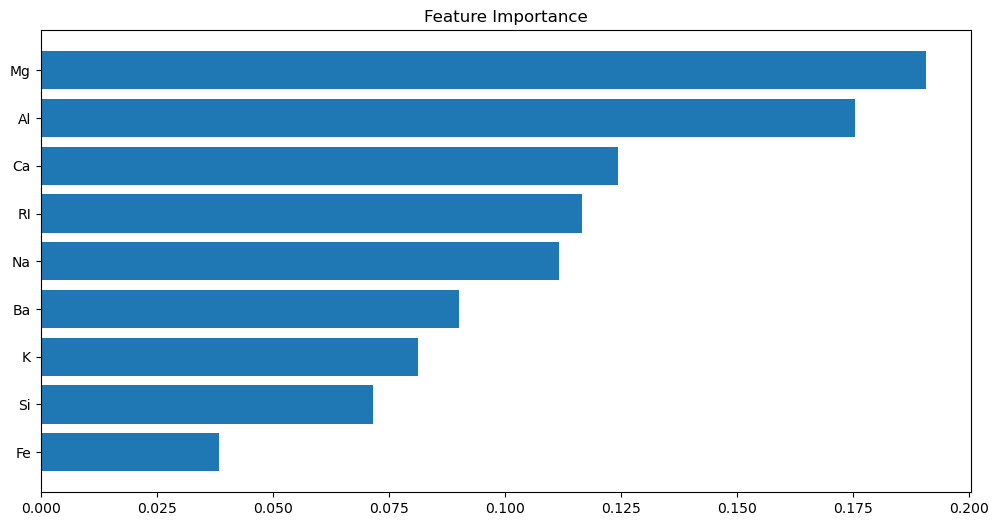

In [35]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

-----------

In [36]:
## SAve the Model

In [37]:
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(clf, file)